In [1]:
apikey='H9iod5aNrd3jK2jF2XdK9ahATJMKg5khSVmnmk4m2JkbSN96P0qPj2Yhru90zPHe'
secret='L7DoVVoLGwCojEtHnirsPifL55TY0BVqhdtIuaTFhFLIyYhjkpvih^MrSwunp5kF8'

In [2]:
from binance import Client, ThreadedWebsocketManager, ThreadedDepthCacheManager
import pandas as pd
import numpy as np     
import datetime 

In [3]:
client=Client(apikey,secret)  

In [4]:
#  [
#   [
#     1499040000000,      // Open time
#     "0.01634790",       // Open
#     "0.80000000",       // High
#     "0.01575800",       // Low
#     "0.01577100",       // Close
#     "148976.11427815^",  // Volume
#     1499644799999,      // Close time
#     "2434.19055334",    // Quote asset volume
#     308,                // Number of trades
#     "1756.87402397",    // Taker buy base asset volume
#     "28.46694368",      // Taker buy quote asset volume
#     "17928899.62484339" // Ignore.
#   ]
# ]
#client.get_historical_klines??

In [5]:
historical = client.get_historical_klines('LTCUSDT',Client.KLINE_INTERVAL_1DAY,'17 Aug 2017')# parameters:(symbol, interval, date_from)
# ltc = client.get_historical_klines('LTCUSDT',Client.KLINE_INTERVAL_1DAY,'1 Feb,2023')# parameters:(symbol, interval, date_from)
historical

[[1513123200000,
  '272.00000000',
  '330.00000000',
  '260.00000000',
  '290.01000000',
  '9565.16019000',
  1513209599999,
  '2770877.00276700',
  4709,
  '3930.49388000',
  '1146169.97119300',
  '0'],
 [1513209600000,
  '290.01000000',
  '302.72000000',
  '252.00000000',
  '272.40000000',
  '9631.98382000',
  1513295999999,
  '2666481.14992110',
  5753,
  '4291.36257000',
  '1196920.22454860',
  '0'],
 [1513296000000,
  '272.40000000',
  '314.21000000',
  '239.99000000',
  '294.00000000',
  '16579.78235000',
  1513382399999,
  '4658823.65081600',
  7826,
  '9339.39791000',
  '2638328.96365740',
  '0'],
 [1513382400000,
  '294.00000000',
  '305.00000000',
  '285.00000000',
  '293.97000000',
  '9102.10005000',
  1513468799999,
  '2674491.78527750',
  6151,
  '3601.16255000',
  '1062827.03643380',
  '0'],
 [1513468800000,
  '293.01000000',
  '328.80000000',
  '290.00000000',
  '311.40000000',
  '14682.26118000',
  1513555199999,
  '4618546.96648190',
  10383,
  '8280.03170000',
  '2602

In [6]:
hist_df=pd.DataFrame(historical)
ltc_df=hist_df[-90:]
hist_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
0,1513123200000,272.00000000,330.00000000,260.00000000,290.01000000,9565.16019000,1513209599999,2770877.00276700,4709,3930.49388000,1146169.97119300,0
1,1513209600000,290.01000000,302.72000000,252.00000000,272.40000000,9631.98382000,1513295999999,2666481.14992110,5753,4291.36257000,1196920.22454860,0
2,1513296000000,272.40000000,314.21000000,239.99000000,294.00000000,16579.78235000,1513382399999,4658823.65081600,7826,9339.39791000,2638328.96365740,0
3,1513382400000,294.00000000,305.00000000,285.00000000,293.97000000,9102.10005000,1513468799999,2674491.78527750,6151,3601.16255000,1062827.03643380,0
4,1513468800000,293.01000000,328.80000000,290.00000000,311.40000000,14682.26118000,1513555199999,4618546.96648190,10383,8280.03170000,2602599.78754250,0


In [7]:
ltc_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11
1903,1677542400000,94.07000000,96.02000000,93.02000000,93.80000000,380334.63400000,1677628799999,35920634.83761000,87961,194509.01800000,18373768.81330000,0
1904,1677628800000,93.79000000,98.37000000,93.56000000,97.78000000,578624.04000000,1677715199999,56044405.19970000,123741,310759.01300000,30096755.15440000,0
1905,1677715200000,97.77000000,98.33000000,93.89000000,95.39000000,531837.14800000,1677801599999,50971274.63378000,94017,270054.86900000,25891886.28034000,0
1906,1677801600000,95.39000000,95.52000000,85.30000000,90.56000000,932908.77200000,1677887999999,83331577.54116000,180779,421471.74400000,37638239.08684000,0
1907,1677888000000,90.56000000,90.85000000,87.40000000,89.34000000,347999.15100000,1677974399999,31120476.32455000,78222,167864.45400000,15008327.41757000,0


In [8]:
ltc_df.columns=['date','Open','High','Low','Close','Volume','Close Time','Quote Asset Volume','Number of Trades','TB Base Volume','TB Quote Volume','Ignore']
hist_df.columns=['date','Open','High','Low','Close','Volume','Close Time','Quote Asset Volume','Number of Trades','TB Base Volume','TB Quote Volume','Ignore']
hist_df.head()

,date,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
0,1513123200000,272.00000000,330.00000000,260.00000000,290.01000000,9565.16019000,1513209599999,2770877.00276700,4709,3930.49388000,1146169.97119300,0
1,1513209600000,290.01000000,302.72000000,252.00000000,272.40000000,9631.98382000,1513295999999,2666481.14992110,5753,4291.36257000,1196920.22454860,0
2,1513296000000,272.40000000,314.21000000,239.99000000,294.00000000,16579.78235000,1513382399999,4658823.65081600,7826,9339.39791000,2638328.96365740,0
3,1513382400000,294.00000000,305.00000000,285.00000000,293.97000000,9102.10005000,1513468799999,2674491.78527750,6151,3601.16255000,1062827.03643380,0
4,1513468800000,293.01000000,328.80000000,290.00000000,311.40000000,14682.26118000,1513555199999,4618546.96648190,10383,8280.03170000,2602599.78754250,0


In [9]:
ltc_df.dtypes #int64 + objects (which are strings) >> preprocessing

date                   int64
Open                  object
High                  object
Low                   object
Close                 object
Volume                object
Close Time             int64
Quote Asset Volume    object
Number of Trades       int64
TB Base Volume        object
TB Quote Volume       object
Ignore                object
dtype: object

In [10]:
#convert from Unix timestamps to date
hist_df['date']= pd.to_datetime(hist_df['date']/1000, unit='s')
hist_df['Close Time']= pd.to_datetime(hist_df['Close Time']/1000, unit='s')
hist_df.dtypes

date                  datetime64[ns]
Open                          object
High                          object
Low                           object
Close                         object
Volume                        object
Close Time            datetime64[ns]
Quote Asset Volume            object
Number of Trades               int64
TB Base Volume                object
TB Quote Volume               object
Ignore                        object
dtype: object

In [11]:
#convert from Unix timestamps to date
ltc_df['date']= pd.to_datetime(ltc_df['date']/1000, unit='s')
ltc_df['Close Time']= pd.to_datetime(ltc_df['Close Time']/1000, unit='s')
ltc_df.dtypes

C:\Users\Layan\AppData\Local\Temp\ipykernel_17716\1570041209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ltc_df['date']= pd.to_datetime(ltc_df['date']/1000, unit='s')
C:\Users\Layan\AppData\Local\Temp\ipykernel_17716\1570041209.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ltc_df['Close Time']= pd.to_datetime(ltc_df['Close Time']/1000, unit='s')


date                  datetime64[ns]
Open                          object
High                          object
Low                           object
Close                         object
Volume                        object
Close Time            datetime64[ns]
Quote Asset Volume            object
Number of Trades               int64
TB Base Volume                object
TB Quote Volume               object
Ignore                        object
dtype: object

In [12]:
ltc_df.head() #notice open time and close time 

,date,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
1903,2023-02-28,94.07000000,96.02000000,93.02000000,93.80000000,380334.63400000,2023-02-28 23:59:59.999000064,35920634.83761000,87961,194509.01800000,18373768.81330000,0
1904,2023-03-01,93.79000000,98.37000000,93.56000000,97.78000000,578624.04000000,2023-03-01 23:59:59.999000064,56044405.19970000,123741,310759.01300000,30096755.15440000,0
1905,2023-03-02,97.77000000,98.33000000,93.89000000,95.39000000,531837.14800000,2023-03-02 23:59:59.999000064,50971274.63378000,94017,270054.86900000,25891886.28034000,0
1906,2023-03-03,95.39000000,95.52000000,85.30000000,90.56000000,932908.77200000,2023-03-03 23:59:59.999000064,83331577.54116000,180779,421471.74400000,37638239.08684000,0
1907,2023-03-04,90.56000000,90.85000000,87.40000000,89.34000000,347999.15100000,2023-03-04 23:59:59.999000064,31120476.32455000,78222,167864.45400000,15008327.41757000,0


In [13]:
ltc_df.date=ltc_df.date.apply(lambda x: x.date())
hist_df.date=hist_df.date.apply(lambda x: x.date())

C:\Users\Layan\AppData\Local\Temp\ipykernel_17716\1998663943.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ltc_df.date=ltc_df.date.apply(lambda x: x.date())


In [14]:
numeric_columns=['Open','High','Low','Close','Volume','Quote Asset Volume','TB Base Volume','TB Quote Volume']
hist_df[numeric_columns]=hist_df[numeric_columns].apply(pd.to_numeric,axis=1)
ltc_df[numeric_columns]=ltc_df[numeric_columns].apply(pd.to_numeric,axis=1)
ltc_df.head()

C:\Users\Layan\AppData\Local\Temp\ipykernel_17716\210912463.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ltc_df[numeric_columns]=ltc_df[numeric_columns].apply(pd.to_numeric,axis=1)


,date,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
1903,2023-02-28,94.07,96.02,93.02,93.80,380334.634,2023-02-28 23:59:59.999000064,3.592063e+07,87961,194509.018,1.837377e+07,0
1904,2023-03-01,93.79,98.37,93.56,97.78,578624.040,2023-03-01 23:59:59.999000064,5.604441e+07,123741,310759.013,3.009676e+07,0
1905,2023-03-02,97.77,98.33,93.89,95.39,531837.148,2023-03-02 23:59:59.999000064,5.097127e+07,94017,270054.869,2.589189e+07,0
1906,2023-03-03,95.39,95.52,85.30,90.56,932908.772,2023-03-03 23:59:59.999000064,8.333158e+07,180779,421471.744,3.763824e+07,0
1907,2023-03-04,90.56,90.85,87.40,89.34,347999.151,2023-03-04 23:59:59.999000064,3.112048e+07,78222,167864.454,1.500833e+07,0


In [15]:
ltc_df.dtypes

date                          object
Open                         float64
High                         float64
Low                          float64
Close                        float64
Volume                       float64
Close Time            datetime64[ns]
Quote Asset Volume           float64
Number of Trades               int64
TB Base Volume               float64
TB Quote Volume              float64
Ignore                        object
dtype: object

In [16]:
ltc_df.describe()

,Open,High,Low,Close,Volume,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume
count,90.000000,90.000000,90.000000,90.000000,9.000000e+01,9.000000e+01,90.000000,90.000000,9.000000e+01
mean,88.231778,90.449889,85.489444,88.185778,7.648899e+05,6.636819e+07,160322.788889,373471.140433,3.242667e+07
std,6.014601,5.665702,6.411477,5.986213,4.011148e+05,3.236458e+07,74106.112035,199121.188687,1.616098e+07
min,69.210000,73.830000,65.000000,69.210000,1.466763e+05,1.312981e+07,27833.000000,69279.819000,6.207123e+06
25%,85.367500,87.342500,82.117500,85.367500,4.632027e+05,4.097131e+07,108752.750000,229046.761250,2.052717e+07
50%,89.290000,90.870000,86.955000,89.285000,6.860379e+05,6.202835e+07,149601.000000,337878.660500,3.001601e+07
75%,92.145000,94.285000,89.755000,91.995000,9.200073e+05,8.311134e+07,194664.500000,453328.018000,3.879440e+07
max,101.930000,103.440000,97.600000,101.950000,1.958666e+06,1.688043e+08,394369.000000,962102.168000,8.630967e+07


In [17]:
ltc_df.describe(include='object')

,date,Ignore
count,90,90
unique,90,1
top,2023-02-28,0
freq,1,90


In [18]:
ltc_df.describe(include='datetime')

C:\Users\Layan\AppData\Local\Temp\ipykernel_17716\261289646.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  ltc_df.describe(include='datetime')


,Close Time
count,90
unique,90
top,2023-02-28 23:59:59.999000064
freq,1
first,2023-02-28 23:59:59.999000064
last,2023-05-28 23:59:59.999000064


In [19]:
ltc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 1903 to 1992
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                90 non-null     object        
 1   Open                90 non-null     float64       
 2   High                90 non-null     float64       
 3   Low                 90 non-null     float64       
 4   Close               90 non-null     float64       
 5   Volume              90 non-null     float64       
 6   Close Time          90 non-null     datetime64[ns]
 7   Quote Asset Volume  90 non-null     float64       
 8   Number of Trades    90 non-null     int64         
 9   TB Base Volume      90 non-null     float64       
 10  TB Quote Volume     90 non-null     float64       
 11  Ignore              90 non-null     object        
dtypes: datetime64[ns](1), float64(8), int64(1), object(2)
memory usage: 8.6+ KB


In [20]:
ltc_df.head()

,date,Open,High,Low,Close,Volume,Close Time,Quote Asset Volume,Number of Trades,TB Base Volume,TB Quote Volume,Ignore
1903,2023-02-28,94.07,96.02,93.02,93.80,380334.634,2023-02-28 23:59:59.999000064,3.592063e+07,87961,194509.018,1.837377e+07,0
1904,2023-03-01,93.79,98.37,93.56,97.78,578624.040,2023-03-01 23:59:59.999000064,5.604441e+07,123741,310759.013,3.009676e+07,0
1905,2023-03-02,97.77,98.33,93.89,95.39,531837.148,2023-03-02 23:59:59.999000064,5.097127e+07,94017,270054.869,2.589189e+07,0
1906,2023-03-03,95.39,95.52,85.30,90.56,932908.772,2023-03-03 23:59:59.999000064,8.333158e+07,180779,421471.744,3.763824e+07,0
1907,2023-03-04,90.56,90.85,87.40,89.34,347999.151,2023-03-04 23:59:59.999000064,3.112048e+07,78222,167864.454,1.500833e+07,0


In [21]:
hist_df["close_nextday"] = hist_df.Close.shift(-1)
ltc_df["close_nextday"] = ltc_df.Close.shift(-1)

C:\Users\Layan\AppData\Local\Temp\ipykernel_17716\2678768777.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ltc_df["close_nextday"] = ltc_df.Close.shift(-1)


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Layan\AppData\Local\Temp\ipykernel_17716\2087155994.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = ltc_df.corr()


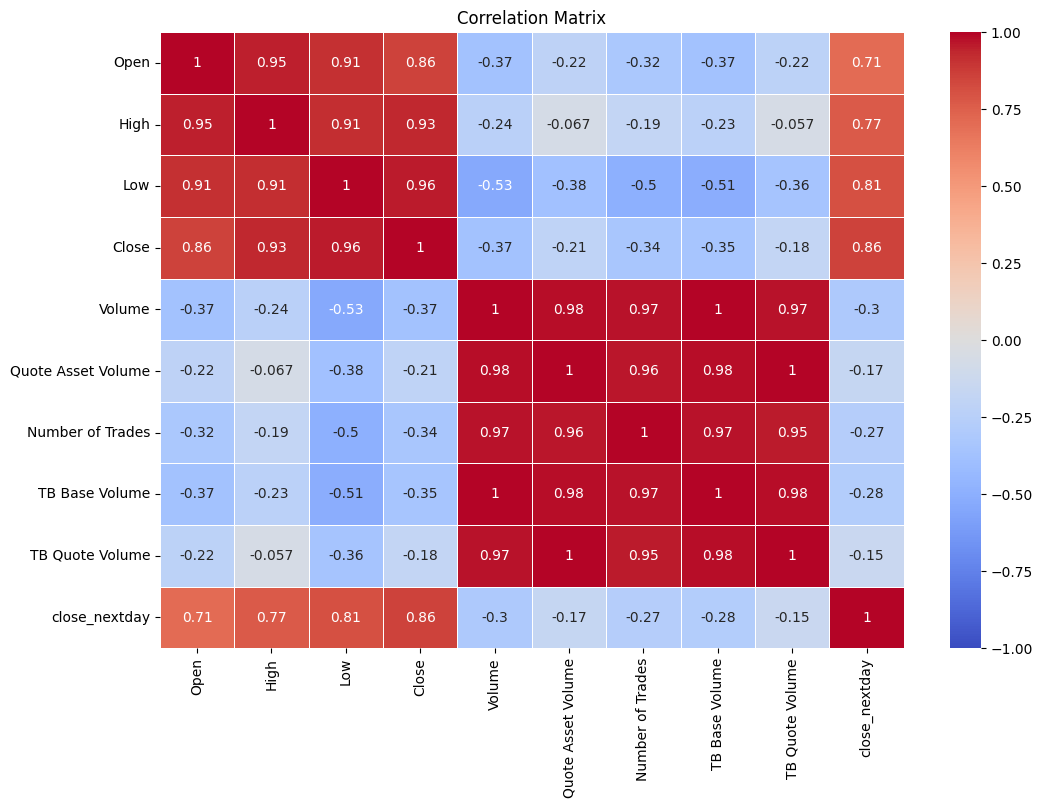

In [23]:
correlations = ltc_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [24]:
hist_df.drop(['Quote Asset Volume','TB Quote Volume','Number of Trades','TB Base Volume','Close Time','Ignore','Volume'], axis=1,inplace=True)
data_csv=hist_df
data_csv.to_csv('ltc_prediction_data.csv')
data_csv

,date,Open,High,Low,Close,close_nextday
0,2017-12-13,272.00,330.00,260.00,290.01,272.40
1,2017-12-14,290.01,302.72,252.00,272.40,294.00
2,2017-12-15,272.40,314.21,239.99,294.00,293.97
3,2017-12-16,294.00,305.00,285.00,293.97,311.40
4,2017-12-17,293.01,328.80,290.00,311.40,352.00
...,...,...,...,...,...,...
1988,2023-05-24,91.70,91.89,84.33,85.82,86.57
1989,2023-05-25,85.83,86.79,82.54,86.57,87.08
1990,2023-05-26,86.57,88.20,86.05,87.08,88.55
1991,2023-05-27,87.08,88.81,86.91,88.55,89.89


In [25]:
data_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1993 entries, 0 to 1992
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1993 non-null   object 
 1   Open           1993 non-null   float64
 2   High           1993 non-null   float64
 3   Low            1993 non-null   float64
 4   Close          1993 non-null   float64
 5   close_nextday  1992 non-null   float64
dtypes: float64(5), object(1)
memory usage: 93.5+ KB


# Blockchain Data 

In [26]:
import requests

url = 'https://min-api.cryptocompare.com/data/blockchain/histo/day'
params = {'fsym': 'LTC', 'limit': 1825, 'api_key': 'e6a9a2c327eba343b8ba318f86017574f6d9bdb9d5d13ae643531bda926f5e32'}

response = requests.get(url, params=params)

if response.status_code != 200:
    print(f'Request failed with status code {response.status_code}.')
else:
    data = response.json()['Data']
    print(data)


{'Aggregated': False, 'TimeFrom': 1527552000, 'TimeTo': 1685232000, 'Data': [{'id': 3808, 'symbol': 'LTC', 'time': 1527552000, 'zero_balance_addresses_all_time': 27757898, 'unique_addresses_all_time': 30636656, 'new_addresses': 35501, 'active_addresses': 110853, 'transaction_count': 27274, 'transaction_count_all_time': 24732963, 'large_transaction_count': 240, 'average_transaction_value': 49.1141885071119, 'block_height': 1430374, 'hashrate': 310.189298084648, 'difficulty': 10923291.7119695, 'block_time': 151.246935201401, 'block_size': 31207, 'current_supply': 56757433.2334715}, {'id': 3808, 'symbol': 'LTC', 'time': 1527638400, 'zero_balance_addresses_all_time': 27789014, 'unique_addresses_all_time': 30671090, 'new_addresses': 34434, 'active_addresses': 105981, 'transaction_count': 25999, 'transaction_count_all_time': 24758962, 'large_transaction_count': 220, 'average_transaction_value': 52.489090244809, 'block_height': 1430886, 'hashrate': 277.778313204701, 'difficulty': 10923291.711

In [27]:
import pandas as pd

df = pd.DataFrame(data)
print(df.head())

   Aggregated    TimeFrom      TimeTo  \
0       False  1527552000  1685232000   
1       False  1527552000  1685232000   
2       False  1527552000  1685232000   
3       False  1527552000  1685232000   
4       False  1527552000  1685232000   

                                                Data  
0  {'id': 3808, 'symbol': 'LTC', 'time': 15275520...  
1  {'id': 3808, 'symbol': 'LTC', 'time': 15276384...  
2  {'id': 3808, 'symbol': 'LTC', 'time': 15277248...  
3  {'id': 3808, 'symbol': 'LTC', 'time': 15278112...  
4  {'id': 3808, 'symbol': 'LTC', 'time': 15278976...  


In [28]:
data_column = df['Data']
print(data_column)

0       {'id': 3808, 'symbol': 'LTC', 'time': 15275520...
1       {'id': 3808, 'symbol': 'LTC', 'time': 15276384...
2       {'id': 3808, 'symbol': 'LTC', 'time': 15277248...
3       {'id': 3808, 'symbol': 'LTC', 'time': 15278112...
4       {'id': 3808, 'symbol': 'LTC', 'time': 15278976...
                              ...                        
1819    {'id': 3808, 'symbol': 'LTC', 'time': 16847136...
1820    {'id': 3808, 'symbol': 'LTC', 'time': 16848000...
1821    {'id': 3808, 'symbol': 'LTC', 'time': 16848864...
1822    {'id': 3808, 'symbol': 'LTC', 'time': 16849728...
1823    {'id': 3808, 'symbol': 'LTC', 'time': 16850592...
Name: Data, Length: 1824, dtype: object


In [29]:
import pandas as pd

# assuming your original dataframe is called 'df'
blockchain_ltc = pd.json_normalize(df['Data'])
# now df contains a flat dataframe with the columns from the dictionary in the 'Data' column
print(blockchain_ltc.head())

     id symbol        time  zero_balance_addresses_all_time  \
0  3808    LTC  1527552000                         27757898   
1  3808    LTC  1527638400                         27789014   
2  3808    LTC  1527724800                         27820632   
3  3808    LTC  1527811200                         27847579   
4  3808    LTC  1527897600                         27873754   

   unique_addresses_all_time  new_addresses  active_addresses  \
0                   30636656          35501            110853   
1                   30671090          34434            105981   
2                   30706773          35683            101919   
3                   30740659          33886             99966   
4                   30771076          30417             93350   

   transaction_count  transaction_count_all_time  large_transaction_count  \
0              27274                    24732963                      240   
1              25999                    24758962                      220   

In [30]:
#hist_df['date']= pd.to_datetime(hist_df['date']/1000, unit='s')
blockchain_ltc['time'] = pd.to_datetime(blockchain_ltc['time'], unit='s')

In [31]:
blockchain_ltc = blockchain_ltc.rename(columns={'time': 'date'})

In [32]:
blockchain_ltc.date=blockchain_ltc.date.apply(lambda x: x.date())

In [33]:
blockchain_ltc.head()

,id,symbol,date,zero_balance_addresses_all_time,unique_addresses_all_time,new_addresses,active_addresses,transaction_count,transaction_count_all_time,large_transaction_count,average_transaction_value,block_height,hashrate,difficulty,block_time,block_size,current_supply
0,3808,LTC,2018-05-29,27757898,30636656,35501,110853,27274,24732963,240,49.114189,1430374,310.189298,1.092329e+07,151.246935,31207,5.675743e+07
1,3808,LTC,2018-05-30,27789014,30671090,34434,105981,25999,24758962,220,52.489090,1430886,277.778313,1.092329e+07,168.894325,34993,5.677023e+07
2,3808,LTC,2018-05-31,27820632,30706773,35683,101919,26895,24785857,211,86.464212,1431447,302.629070,1.084916e+07,153.973214,31506,5.678426e+07
3,3808,LTC,2018-06-01,27847579,30740659,33886,99966,26046,24811903,171,81.535506,1432006,290.449101,1.045068e+07,154.537634,29289,5.679823e+07
4,3808,LTC,2018-06-02,27873754,30771076,30417,93350,23426,24835329,227,109.934922,1432553,284.298494,1.045068e+07,157.880952,28820,5.681191e+07


In [34]:
blockchain_ltc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1824 entries, 0 to 1823
Data columns (total 17 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               1824 non-null   int64  
 1   symbol                           1824 non-null   object 
 2   date                             1824 non-null   object 
 3   zero_balance_addresses_all_time  1824 non-null   int64  
 4   unique_addresses_all_time        1824 non-null   int64  
 5   new_addresses                    1824 non-null   int64  
 6   active_addresses                 1824 non-null   int64  
 7   transaction_count                1824 non-null   int64  
 8   transaction_count_all_time       1824 non-null   int64  
 9   large_transaction_count          1824 non-null   int64  
 10  average_transaction_value        1824 non-null   float64
 11  block_height                     1824 non-null   int64  
 12  hashrate            

In [35]:
ltc_df_corr = blockchain_ltc[-180:]
historical_df_corr=hist_df[-180:]
merged_df_corr = pd.merge(ltc_df_corr, historical_df_corr, on=['date'])

In [36]:
ltc_df = blockchain_ltc[:]
historical_df=hist_df[:]
merged_df = pd.merge(ltc_df, historical_df, on=['date'])

In [37]:
merged_df.head()

,id,symbol,date,zero_balance_addresses_all_time,unique_addresses_all_time,new_addresses,active_addresses,transaction_count,transaction_count_all_time,large_transaction_count,...,hashrate,difficulty,block_time,block_size,current_supply,Open,High,Low,Close,close_nextday
0,3808,LTC,2018-05-29,27757898,30636656,35501,110853,27274,24732963,240,...,310.189298,1.092329e+07,151.246935,31207,5.675743e+07,110.66,122.71,109.41,119.28,117.18
1,3808,LTC,2018-05-30,27789014,30671090,34434,105981,25999,24758962,220,...,277.778313,1.092329e+07,168.894325,34993,5.677023e+07,119.52,122.73,114.69,117.18,118.25
2,3808,LTC,2018-05-31,27820632,30706773,35683,101919,26895,24785857,211,...,302.629070,1.084916e+07,153.973214,31506,5.678426e+07,117.18,121.01,116.04,118.25,120.19
3,3808,LTC,2018-06-01,27847579,30740659,33886,99966,26046,24811903,171,...,290.449101,1.045068e+07,154.537634,29289,5.679823e+07,118.25,120.40,116.62,120.19,123.44
4,3808,LTC,2018-06-02,27873754,30771076,30417,93350,23426,24835329,227,...,284.298494,1.045068e+07,157.880952,28820,5.681191e+07,120.19,124.50,118.66,123.44,125.33


In [38]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1824 entries, 0 to 1823
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   id                               1824 non-null   int64  
 1   symbol                           1824 non-null   object 
 2   date                             1824 non-null   object 
 3   zero_balance_addresses_all_time  1824 non-null   int64  
 4   unique_addresses_all_time        1824 non-null   int64  
 5   new_addresses                    1824 non-null   int64  
 6   active_addresses                 1824 non-null   int64  
 7   transaction_count                1824 non-null   int64  
 8   transaction_count_all_time       1824 non-null   int64  
 9   large_transaction_count          1824 non-null   int64  
 10  average_transaction_value        1824 non-null   float64
 11  block_height                     1824 non-null   int64  
 12  hashrate            

In [39]:
merged_df.drop(['symbol','id'],axis=1,inplace=True)
merged_df_corr.drop(['symbol','id'],axis=1,inplace=True)

C:\Users\Layan\AppData\Local\Temp\ipykernel_17716\3744872051.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = merged_df_corr.corr()


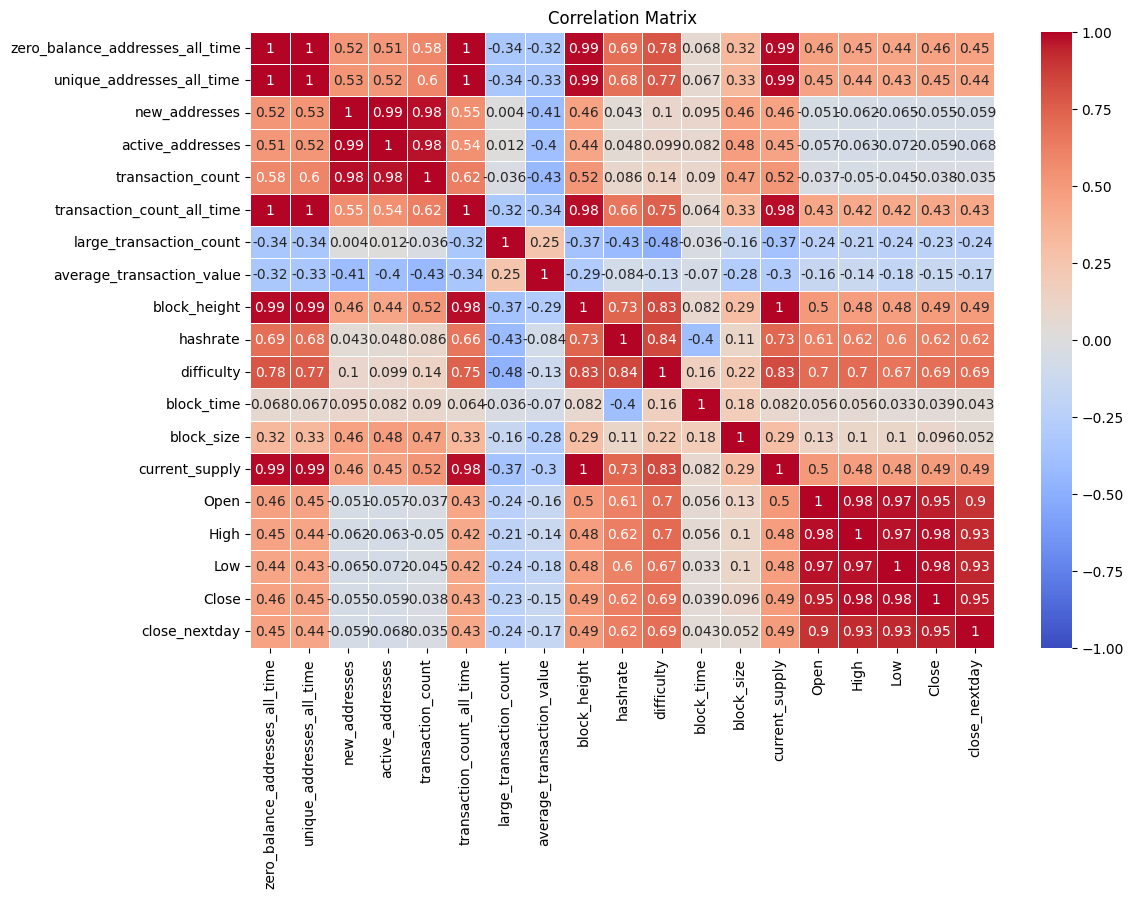

In [40]:
correlations = merged_df_corr.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm", vmin=-1, vmax=1, linewidths=.5)
plt.title("Correlation Matrix")
plt.show()

In [41]:
correlations['close_nextday'].sort_values(ascending=False)

close_nextday                      1.000000
Close                              0.951789
Low                                0.932745
High                               0.926865
Open                               0.904422
difficulty                         0.690395
hashrate                           0.617515
current_supply                     0.485696
block_height                       0.485394
zero_balance_addresses_all_time    0.454765
unique_addresses_all_time          0.444797
transaction_count_all_time         0.427794
block_size                         0.052453
block_time                         0.043103
transaction_count                 -0.034857
new_addresses                     -0.058755
active_addresses                  -0.068063
average_transaction_value         -0.165709
large_transaction_count           -0.237501
Name: close_nextday, dtype: float64

In [42]:
merged_df = merged_df.drop(correlations['close_nextday'].loc[correlations['close_nextday'] < 0.5].index, axis=1)


In [43]:
merged_df

,date,hashrate,difficulty,Open,High,Low,Close,close_nextday
0,2018-05-29,310.189298,1.092329e+07,110.66,122.71,109.41,119.28,117.18
1,2018-05-30,277.778313,1.092329e+07,119.52,122.73,114.69,117.18,118.25
2,2018-05-31,302.629070,1.084916e+07,117.18,121.01,116.04,118.25,120.19
3,2018-06-01,290.449101,1.045068e+07,118.25,120.40,116.62,120.19,123.44
4,2018-06-02,284.298494,1.045068e+07,120.19,124.50,118.66,123.44,125.33
...,...,...,...,...,...,...,...,...
1819,2023-05-22,710.643539,2.434342e+07,92.17,92.79,89.81,90.83,91.70
1820,2023-05-23,701.787443,2.434342e+07,90.83,93.11,90.38,91.70,85.82
1821,2023-05-24,678.559295,2.434874e+07,91.70,91.89,84.33,85.82,86.57
1822,2023-05-25,705.524436,2.464130e+07,85.83,86.79,82.54,86.57,87.08


In [44]:
# bc_df=blockchain_ltc[1500:]
# historical_df=data_csv[1500:]
# merged_df = pd.merge(blockchain_ltc, data_csv, on=['date'])

In [45]:
merged_df.head()

,date,hashrate,difficulty,Open,High,Low,Close,close_nextday
0,2018-05-29,310.189298,1.092329e+07,110.66,122.71,109.41,119.28,117.18
1,2018-05-30,277.778313,1.092329e+07,119.52,122.73,114.69,117.18,118.25
2,2018-05-31,302.629070,1.084916e+07,117.18,121.01,116.04,118.25,120.19
3,2018-06-01,290.449101,1.045068e+07,118.25,120.40,116.62,120.19,123.44
4,2018-06-02,284.298494,1.045068e+07,120.19,124.50,118.66,123.44,125.33


In [46]:
merged_df.tail()

,date,hashrate,difficulty,Open,High,Low,Close,close_nextday
1819,2023-05-22,710.643539,2.434342e+07,92.17,92.79,89.81,90.83,91.70
1820,2023-05-23,701.787443,2.434342e+07,90.83,93.11,90.38,91.70,85.82
1821,2023-05-24,678.559295,2.434874e+07,91.70,91.89,84.33,85.82,86.57
1822,2023-05-25,705.524436,2.464130e+07,85.83,86.79,82.54,86.57,87.08
1823,2023-05-26,716.004575,2.464130e+07,86.57,88.20,86.05,87.08,88.55


In [47]:
csv_file=merged_df.to_csv('data_with_blockchain_ltc.csv')

# not included 

In [48]:
# import requests
# import pandas as pd
# import datetime
# url = 'https://api.blockchair.com/litecoin/stats/block_size'
# params = {
#     'timespan': '2years',
#     'format': 'json'
# }

# response = requests.get(url,params=params)
# print(response)
# data = response.json()
# df = pd.DataFrame(columns=['date','block_size'])

# df

In [49]:
# import requests
# import pandas as pd
# from datetime import datetime, timedelta

# # Calculate the start and end dates for the desired time range
# end_date = datetime.now().date()
# start_date = end_date - timedelta(days=365 * 5)

# # Define the API endpoint and parameters
# url = 'https://api.coingecko.com/api/v3/coins/litecoin/market_chart'
# params = {
#     'vs_currency': 'usd',
#     'days': '1825',  # 5 years
# }

# # Send a GET request to the API
# response = requests.get(url, params=params)
# data = response.json()

# # Extract the block size data from the response
# timestamps = data['prices']
# blocksize=data['block-size']

# # Split the timestamps and prices into separate lists
# dates = [datetime.fromtimestamp(timestamp[0] / 1000).date() for timestamp in timestamps]
# block_sizes = [price[1] for price in timestamps]

# # Create a DataFrame with the block size data
# df = pd.DataFrame({'Date': dates, 'Block Size': block_sizes})

# # Filter the DataFrame to include only the desired time range
# df = df[(df['Date'] >= start_date) & (df['Date'] <= end_date)]

# # Print the DataFrame
# print(df)

In [50]:
# import requests

# url = 'https://api.blockchair.com/litecoin/stats/block_size?time_start=6%20years%20ago&time_end=now'
# response = requests.get(url)
# data = response.json()
# print(data)


In [51]:
# import requests

# # Set API endpoint
# url = 'https://api.blockchair.com/litecoin/blocks'

# # Set query parameters
# params = {
#     'q': 'time(2019-01-01..2021-01-01)',
#     'a': 'guessed_miner,count()',
#     's': 'count()(desc)'
# }

# # Make API request
# response = requests.get(url, params=params)

# # Print response data
# print(response.json())


In [52]:
# import requests
# import json

# # Define the API endpoint URL
# url = 'https://api.blockchair.com/litecoin/blocks'

# # Define the start and end times for the blockchain data
# start_time = '2022-01-02'
# end_time = '2023-05-10'

# # Set the initial page number to 1
# page_num = 1

# # Set a flag to indicate when we've reached the end of the data
# end_of_data = False

# # Define an empty list to hold the block data
# block_data = []

# # Loop through the API pages until we reach the end of the data
# while not end_of_data:
    
#     # Make the API request with the current page number and time range
#     response = requests.get(url, params={'q': 'time({}..{})'.format(start_time, end_time), 's': 'id', 'p': page_num})
    
#     # Check if the response was successful
#     if response.status_code == 200:
        
#         # Parse the JSON response
#         data = json.loads(response.text)
        
#         # Check if there is any data in the current page
#         if data['data']:
            
#             # Append the block data to the list
#             block_data += data['data']
            
#             # Increment the page number to fetch the next page
#             page_num += 1
            
#         else:
#             # If there is no data in the current page, we've reached the end of the data
#             end_of_data = True
            
#     else:
#         # If the API request was unsuccessful, print the error message
#         print('Error: {}'.format(response.text))
#         end_of_data = True

# # Print the total number of blocks fetched
# print('Fetched {} blocks'.format(len(block_data)))


In [53]:
# import requests

# # set the API endpoint
# url = 'https://api.blockchair.com/litecoin/blocks'

# # set the query parameters
# params = {
#     'q': 'time(2019-01-01..2021-01-01)',
#     's': 'height(desc)',
#     'limit': 1000, # maximum number of results per page
#     'offset': 0, # start from the first page
# }

# # initialize an empty list to store the blocks
# blocks = []

# # fetch the blocks from the API endpoint
# while True:
#     response = requests.get(url, params=params)
#     data = response.json()['data']
#     blocks.extend(data)

#     # check if there are more pages to fetch
#     if len(data) < params['limit']:
#         break

#     # update the offset to fetch the next page
#     params['offset'] += params['limit']

# # print the total number of blocks fetched
# print(f'Total blocks fetched: {len(blocks)}')


In [54]:
# import requests

# # Set API endpoint
# url = 'https://api.blockchair.com/litecoin/stats?api_key=YOUR_API_KEY'

# # Set query parameters
# params = {
#     'fields': ','.join([
#         'hash_rate_24h',
#         'avg_block_size_24h',
#         'blockchain_size',
#         'blocks_24h',
#         'cost_per_transaction_percent',
#         'difficulty',
#         'estimated_transaction_volume_24h',
#         'estimated_transaction_volume_usd_24h',
#         'hash_rate',
#         'n_transactions',
#         'market_price_usd',
#         'n_addresses',
#         'n_transactions_per_block',
#         'n_transactions_total',
#         'miner_revenue_usd_24h',
#         'transaction_fees_usd_24h',
#         'transaction_fees_usd',
#         'n_transactions_excluding_popular',
#         'n_transactions_excluding_chains_longer_than_100',
#         'output_volume_24h',
#         'total_coins_mined',
#         'trade_volume_usd_24h'
#     ]),
#     's': 'date',
#     'q': 'date(2022-01-01..2022-12-31)'
# }

# # Make API request
# response = requests.get(url, params=params)

# # Print response data
# print(response.json())


In [55]:
# import requests

# # Set up the API endpoint URL
# url = "https://api.blockchair.com/litecoin/stats"

# # Set up the query parameters for the request
# params = {
#     "q": "price_usd,market_cap_usd,volume_24h_usd",
#     "s": "date",
#     "u": "month"
# }

# # Send the GET request to the API endpoint
# response = requests.get(url, params=params)

# # Parse the response JSON data
# data = response.json()

# # Print the data
# print(data)


In [56]:
# import warnings
# import requests
# from datetime import datetime
# import pandas as pd

# # Ignore FutureWarning messages
# warnings.filterwarnings("ignore", category=FutureWarning)

# # Define the base URL for the Litecoin API
# url = 'https://api.blockchair.com/litecoin/charts'

# # Set the query parameters
# params = {
#     's': 'date',
#     'u': 'usd',
#     'export': 'csv'
# }

# # Define the data to retrieve
# data_types = ['hashrate', 'price', 'difficulty', 'transaction_count', 'block_count']

# # Initialize a dictionary to store the dataframes
# dfs = {}

# # Loop over the data types and retrieve the data
# for data_type in data_types:
#     # Set the API endpoint for the current data type
#     current_url = f"{url}/{data_type}"
    
#     # Make the API request
#     response = requests.get(current_url, params=params)
    
#     # Convert the CSV data to a DataFrame
#     df = pd.read_csv(response.content.decode('utf-8'))
#     df.columns = ['date', data_type]
    
#     # Convert the date column to a datetime object
#     df['date'] = pd.to_datetime(df['date'])
    
#     # Set the date column as the index
#     df.set_index('date', inplace=True)
    
#     # Store the DataFrame in the dictionary
#     dfs[data_type] = df

# # Print the DataFrames
# for data_type, df in dfs.items():
#     print(f"{data_type}:")
#     print(df)
#     print("\n")
